In [1]:
#pip install imgaug

In [2]:
import numpy as np
import imgaug.augmenters as iaa
import cv2
import matplotlib.pyplot as plt

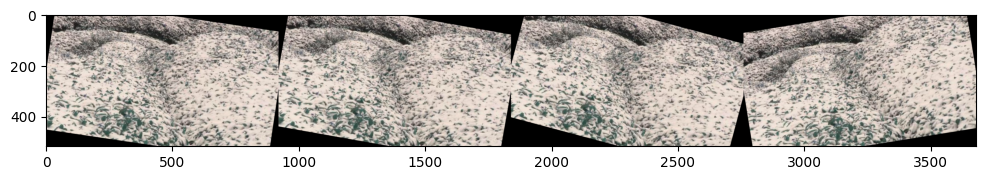

In [3]:
img = cv2.imread("./data/sample_data_01\\train\\snow\\0830.jpg")
images = [img, img, img, img]

# Affine 변환 - scale 조정, 이동, 회전등 가능
rotate = iaa.Affine(rotate=(-25,25))
imgs_aug = rotate(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(imgs_aug))
plt.show()

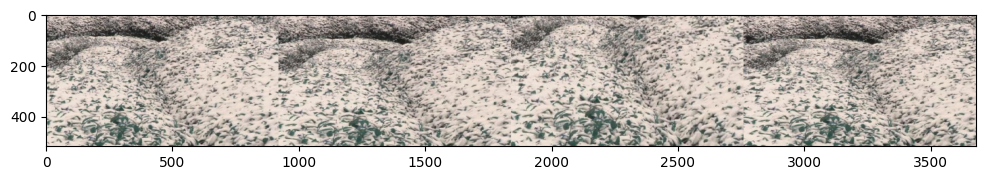

In [4]:
# Crop
crop = iaa.Crop(percent=(0,0.2))
imgs_aug = crop(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(imgs_aug))
plt.show()

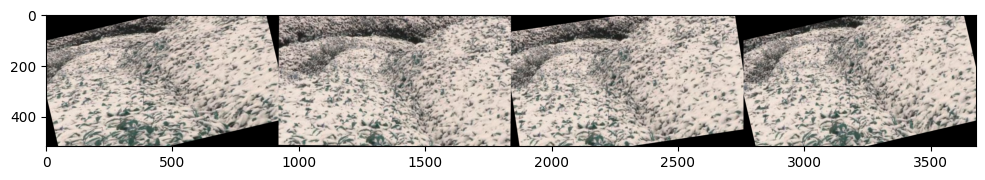

In [5]:
# Sequential을 이용하여 순차적 적용
rotate_crop = iaa.Sequential([
    iaa.Affine(rotate=(-25,25)),
    iaa.Crop(percent=(0,0.2))
], random_order=True)
imgs_aug = rotate_crop(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(imgs_aug))
plt.show()

In [6]:
# Oneof - 하나를 선택 적용
seq = iaa.OneOf([
    iaa.Grayscale(alpha=(0.0,1.0)),
    iaa.AddToSaturation((-50,50))
])
imgs_aug = seq(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(imgs_aug))
plt.show()

C:\anaconda3\envs\condatorch\lib\site-packages\imgaug\augmenters\meta.py:3368: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  augmenter_active = np.zeros((nb_rows, len(self)), dtype=np.bool)


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

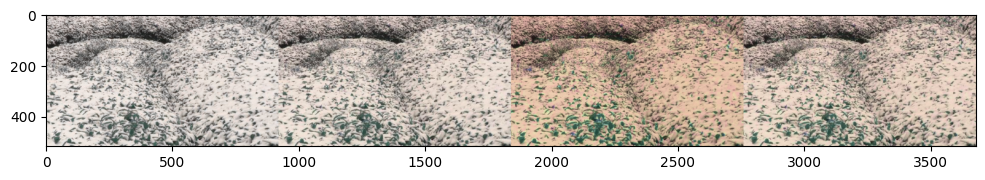

In [7]:
#Sometimes - 확률적 적용
seq = iaa.Sequential([
    iaa.Sometimes(
        0.6,
        iaa.AddToSaturation((-50,50))
    ),
    iaa.Sometimes(
        0.2,
        iaa.Grayscale(alpha=(0.0, 1.0))
    )
])
imgs_aug = seq(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(imgs_aug))
plt.show()

# DataLoader + Imgaug

In [8]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
import imgaug as ia

In [15]:
def imgaug_transform(img):
    seq = iaa.Sequential([
        iaa.Fliplr(0.5),
        iaa.GaussianBlur(sigma=(0,1.0)),
        iaa.Multiply((0.8,1.2)),
    ])
    img_np = img.permute(1,2,0).numpy()
    img_aug = seq(image=img_np)
    img_aug_copy = img_aug.copy()
    img_aug_tensor = torch.from_numpy(img_aug_copy).permute(2,0,1)
    return img_aug_tensor

In [16]:
def transform_data(img):
    tensor = transforms.ToTensor()(img)
    transformed_tensor = imgaug_transform(tensor)
    return transformed_tensor

In [17]:
# CIFAR-10 데이터 로드
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_data)

#데이터로더 설정
batch_size = 4
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

Files already downloaded and verified


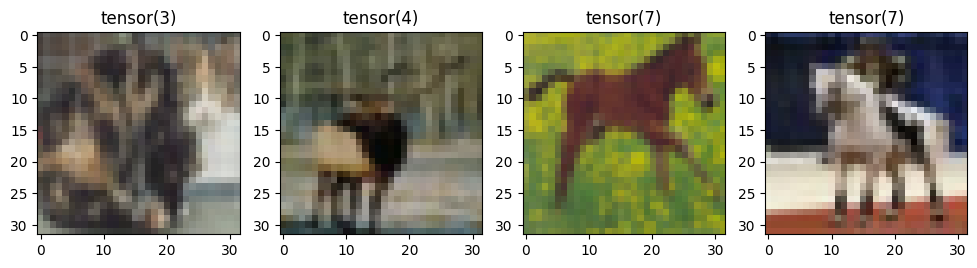

In [18]:
for images, labels in train_dataloader:
    fig, axes = plt.subplots(1, batch_size, figsize=(12,4))
    
    for i in range(batch_size):
        img = images[i].permute(1,2,0).numpy()
        axes[i].imshow(img)
        axes[i].set_title(labels[i])
    break
        
    plt.show()